In [75]:

words = open('/content/Change Text Case.txt','r').read().splitlines()


In [ ]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
N = torch.zeros((27,27), dtype=torch.int32)

In [77]:

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

for w in words:
  chars = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chars,chars[1:]):
    it1 = stoi[ch1]
    it2 = stoi[ch2]

    N[it1,it2] += 1




KeyError: 23

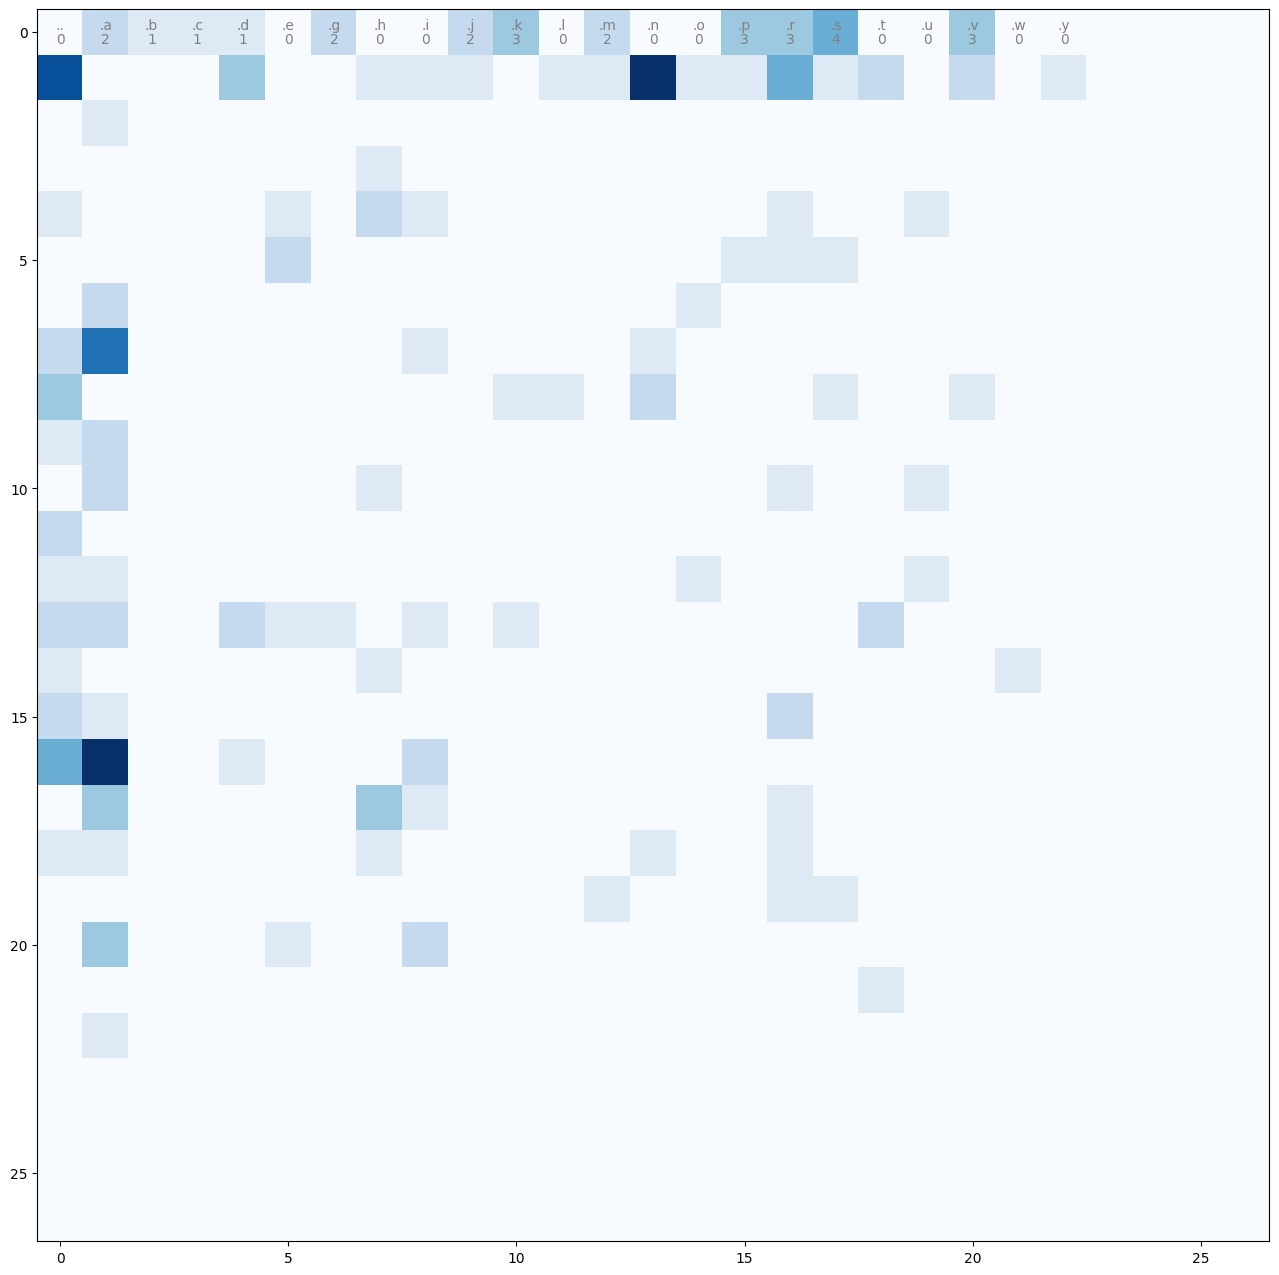

In [78]:

itos = {i:s for s,i in stoi.items()}

plt.figure(figsize=(16,16))
plt.imshow(N,cmap ='Blues')

for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
    plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray")

plt.axis("off")


In [ ]:
P = (N+1).float()
P/=P.sum(1,keepdim=True)


In [ ]:
# p = N[0,:].float()
# p = p/p.sum()

g = torch.Generator().manual_seed(2147483647)



for i in range(20):
  idx = 0
  out = []


  while True:
    p = P[idx]
    # p = p/p.sum()
    idx = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[idx])
    # print(itos[idx])
    if idx == 0:
      break

  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [ ]:
# Loss Function

log_likelihood = 0.0
n = 0
for w in words:
  chars = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chars,chars[1:]):
    it1 = stoi[ch1]
    it2 = stoi[ch2]

    logprob = torch.log(P[it1,it2])
    log_likelihood += logprob
    n += 1


print(log_likelihood)
nll = -log_likelihood
print(nll/n)

tensor(-559951.5625)
tensor(2.4544)


In [ ]:
# Defining the Training set of Bigrams

xs, ys = [], []

for w in words:
  chars = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chars,chars[1:]):
    it1 = stoi[ch1]
    it2 = stoi[ch2]

    xs.append(it1)
    ys.append(it2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [ ]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(27,27,generator=g,requires_grad = True)
import torch.nn.functional as F


In [ ]:
# Gradient Descent

for k in range(100):

  # Forward Pass

  xenc = F.one_hot(xs, num_classes = 27).float()
  logits = (xenc @ W)
  counts = logits.exp()
  probs = counts/counts.sum(1,keepdims=True)
  loss = -probs[torch.arange(num),ys].log().mean()
  print(loss.item())

  # Backward Pass

  W.grad = None # Set Gradient to zero
  loss.backward()

  # Updating Gradients

  W.data += -50 * W.grad

2.456974744796753
2.456967830657959
2.456961154937744
2.4569547176361084
2.4569482803344727
2.456941604614258
2.456934928894043
2.4569287300109863
2.4569220542907715
2.456915855407715
2.4569091796875
2.4569029808044434
2.4568965435028076
2.456890106201172
2.4568839073181152
2.4568774700164795
2.4568710327148438
2.456865072250366
2.4568588733673096
2.4568521976470947
2.4568464756011963
2.4568400382995605
2.456834077835083
2.4568281173706055
2.4568216800689697
2.456815719604492
2.4568097591400146
2.456803798675537
2.4567978382110596
2.456791877746582
2.4567859172821045
2.456780195236206
2.4567742347717285
2.456768274307251
2.4567625522613525
2.456756591796875
2.4567511081695557
2.4567453861236572
2.4567394256591797
2.4567339420318604
2.456727981567383
2.4567222595214844
2.456716775894165
2.4567110538482666
2.4567055702209473
2.456699848175049
2.4566943645477295
2.45668888092041
2.456683397293091
2.4566779136657715
2.456672191619873
2.4566667079925537
2.4566614627838135
2.456655979156494


In [ ]:
# Sampling some of the made up words

for i in range(10):

  out = []
  idx = 0
  while True:
    xenc = F.one_hot(torch.tensor([idx]),num_classes = 27).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts/counts.sum(1,keepdims = True)

    idx = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[idx])
    if idx == 0:
      break

  print(''.join(out))


that.
janosli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
